In [2]:
%matplotlib inline
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
import sys
import os
from __future__ import division
plt.rcParams["figure.figsize"] = (20,10)
from itertools import chain
import tqdm as tqdm
# from colorthief import ColorThief

warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [3]:
votes_data = pd.read_excel('ESC2018_GF.xlsx',sheet_name=0,skiprows=1)
print(votes_data.shape)
votes_data.head(5)

(26, 47)


,Rank,Running order,Country,Total,Albania,Austria,Belarus,Belgium,Croatia,Cyprus,...,Hungary,Moldova,Armenia,Czech Republic,Georgia,Montenegro,Azerbaijan,San Marino,Italy,Australia
0,1,22,Israel,529,6,19,8,16,16,10,...,16,22,18,22,15,1,13,24,9,18
1,2,25,Cyprus,436,20,1,15,11,8,0,...,7,13,19,8,10,6,14,7,8,7
2,3,5,Austria,342,2,0,10,15,0,2,...,11,3,7,5,9,0,0,0,7,5
3,4,11,Germany,340,14,16,0,7,3,3,...,1,8,5,3,7,0,5,14,13,12
4,5,26,Italy,308,24,10,4,6,10,15,...,6,8,3,2,5,12,5,12,0,0


In [4]:
votes_data.tail(5)
print(type(votes_data))

<class 'pandas.core.frame.DataFrame'>


In [33]:
votes_melted = votes_data.melt(
    ['Rank','Running order','Country','Total'],
    var_name = 'Source Country',value_name='points')

In [34]:
votes_melted.head()

,Rank,Running order,Country,Total,Source Country,points
0,1,22,Israel,529,Albania,6
1,2,25,Cyprus,436,Albania,20
2,3,5,Austria,342,Albania,2
3,4,11,Germany,340,Albania,14
4,5,26,Italy,308,Albania,24


In [35]:
G = nx.from_pandas_edgelist(votes_melted,
                            source='Source Country',
                            target='Country',
                            edge_attr='points',
                            create_using=nx.DiGraph())

In [36]:
print(nx.info(G))

DiGraph with 43 nodes and 1118 edges


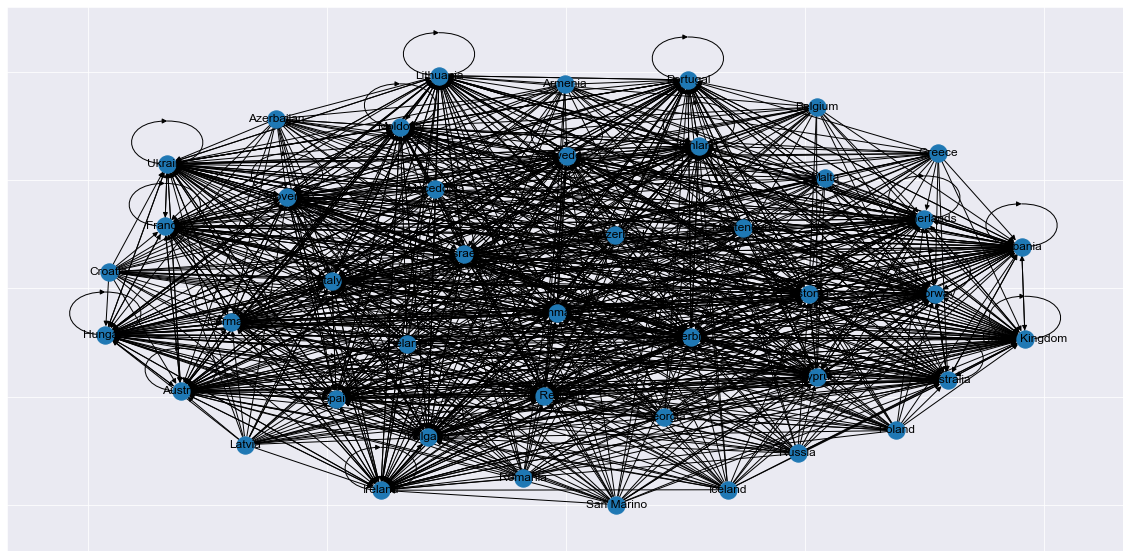

In [37]:
nx.draw_networkx(G)

In [38]:
G.out_degree(weight='points')

OutDegreeView({'Albania': 116, 'Israel': 116, 'Cyprus': 116, 'Austria': 116, 'Germany': 116, 'Italy': 116, 'Czech Republic': 116, 'Sweden': 116, 'Estonia': 116, 'Denmark': 116, 'Moldova': 116, 'Lithuania': 116, 'France': 116, 'Bulgaria': 116, 'Norway': 116, 'Ireland': 116, 'Ukraine': 116, 'Netherlands': 116, 'Serbia': 116, 'Australia': 116, 'Hungary': 116, 'Slovenia': 116, 'Spain': 116, 'United Kingdom': 116, 'Finland': 116, 'Portugal': 116, 'Belarus': 116, 'Belgium': 116, 'Croatia': 116, 'Macedonia': 116, 'Greece': 116, 'Iceland': 116, 'Latvia': 116, 'Malta': 116, 'Poland': 116, 'Romania': 116, 'Russia': 116, 'Switzerland': 116, 'Armenia': 116, 'Georgia': 116, 'Montenegro': 116, 'Azerbaijan': 116, 'San Marino': 116})

In [39]:
Gsub = G.edge_subgraph([(e[0],e[1]) for e in G.edges(data=True) if e[2]['points']>0])

In [40]:
test = nx.info(Gsub)

In [41]:
print(test)

DiGraph with 43 nodes and 650 edges


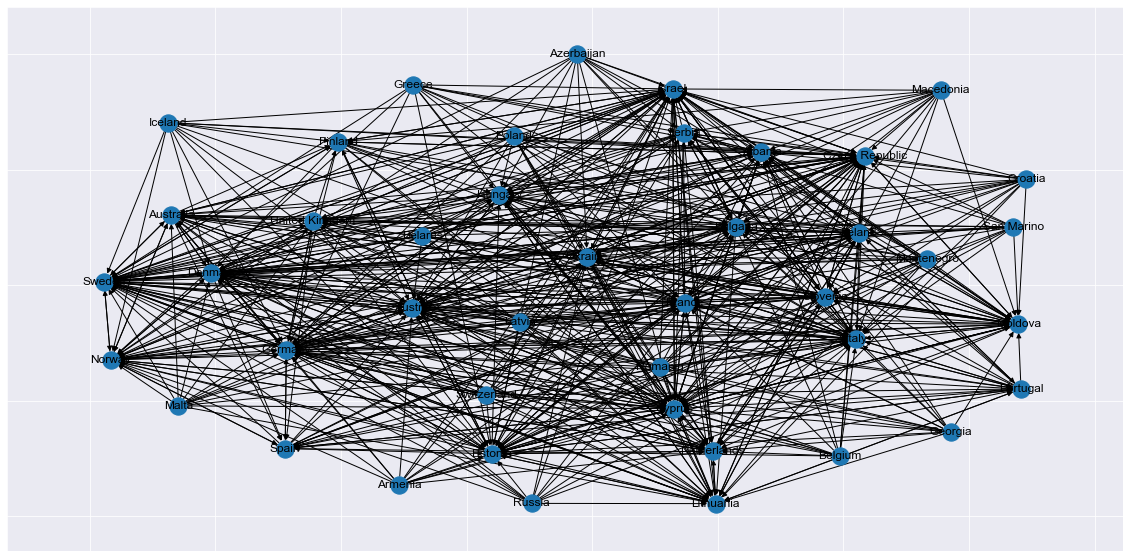

In [42]:
nx.draw_networkx(Gsub)

(array([16.,  1.,  3.,  2.,  3.,  5.,  4.,  1.,  4.,  4.]),
 array([13. , 17.5, 22. , 26.5, 31. , 35.5, 40. , 44.5, 49. , 53.5, 58. ]),
 <BarContainer object of 10 artists>)

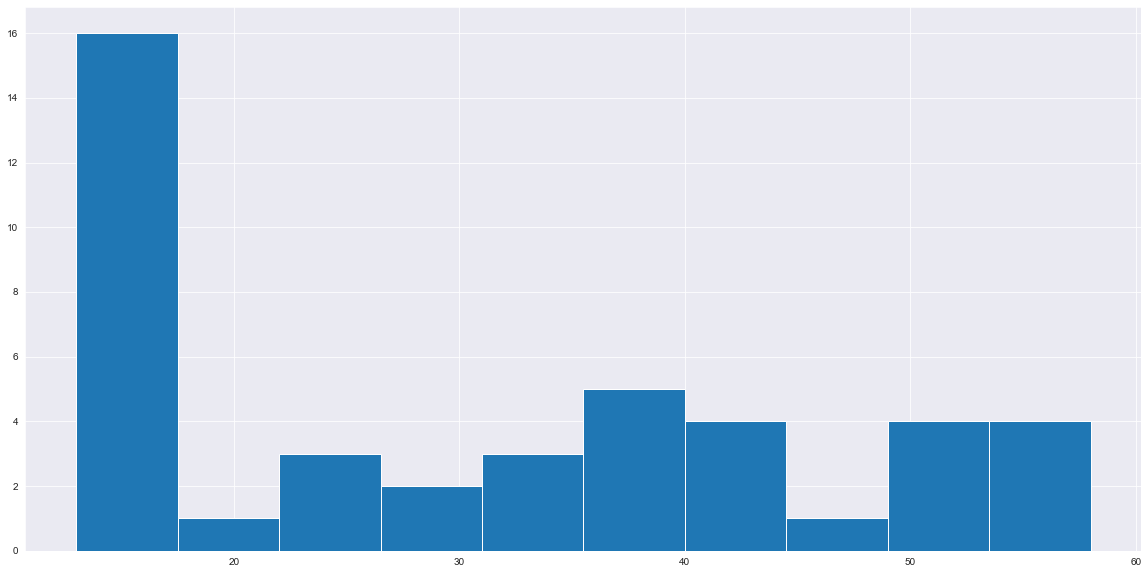

In [43]:
plt.hist(dict(Gsub.degree()).values())

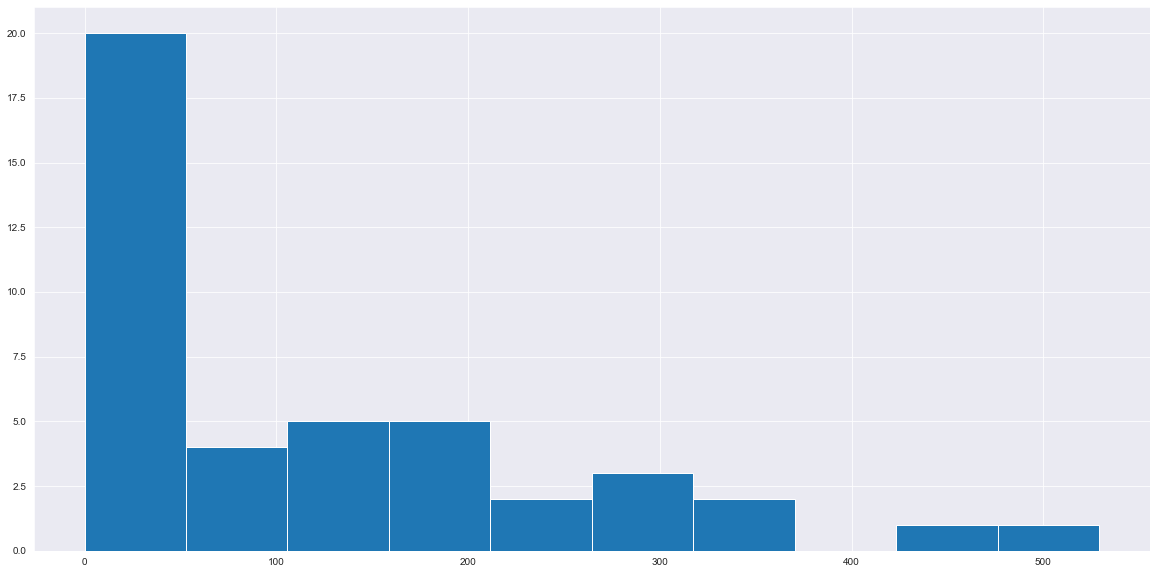

In [44]:
h = plt.hist(dict(G.in_degree(weight='points')).values())

In [45]:
deg_cen_points = dict(G.in_degree(weight='points'))
{k:deg_cen_points[k] for k in deg_cen_points if deg_cen_points[k]==max(deg_cen_points.values())}

{'Israel': 529}

In [46]:
page_rank = dict(nx.pagerank_numpy(G,weight='points'))
{k:page_rank[k] for k in page_rank if page_rank[k]==max(page_rank.values())}

{'Israel': 0.09068710831987256}

In [47]:
between = dict(nx.betweenness_centrality(G,weight='points'))
{k:between[k] for k in between if between[k]==max(between.values())}

{'Estonia': 46701.144689294066}

In [48]:
countries = pd.read_csv('countries.csv',index_col='Country', encoding='cp1252')

In [49]:
countries.head()

,cc2,cc3,numeric,latitude,longitude
Country,,,,,
Afghanistan,AF,AFG,4,33.0000,65.0
Albania,AL,ALB,8,41.0000,20.0
Algeria,DZ,DZA,12,28.0000,3.0
American Samoa,AS,ASM,16,-14.3333,-170.0
Andorra,AD,AND,20,42.5000,1.6


In [50]:
pos_geo = {  node:
           ( max(-10,min(countries.loc[node]['longitude'],55)), # fixing scale
             max(countries.loc[node]['latitude'],25)) #fixing scale
               for node in G.nodes() }
print(pos_geo)

{'Albania': (20.0, 41.0), 'Israel': (37.0, 28.0), 'Cyprus': (30.0, 36.0), 'Austria': (13.3333, 47.3333), 'Germany': (9.0, 51.0), 'Italy': (12.8333, 42.8333), 'Czech Republic': (15.5, 49.75), 'Sweden': (15.0, 62.0), 'Estonia': (26.0, 59.0), 'Denmark': (10.0, 56.0), 'Moldova': (29.0, 47.0), 'Lithuania': (24.0, 56.0), 'France': (2.0, 46.0), 'Bulgaria': (25.0, 43.0), 'Norway': (10.0, 62.0), 'Ireland': (-8.0, 53.0), 'Ukraine': (32.0, 49.0), 'Netherlands': (5.75, 52.5), 'Serbia': (21.0, 44.0), 'Australia': (55, 25), 'Hungary': (20.0, 47.0), 'Slovenia': (15.0, 46.0), 'Spain': (-4.0, 40.0), 'United Kingdom': (-2.0, 54.0), 'Finland': (26.0, 64.0), 'Portugal': (-8.0, 39.5), 'Belarus': (28.0, 53.0), 'Belgium': (4.0, 50.8333), 'Croatia': (15.5, 45.1667), 'Macedonia': (22.0, 41.8333), 'Greece': (22.0, 39.0), 'Iceland': (-10, 65.0), 'Latvia': (25.0, 57.0), 'Malta': (14.5833, 35.8333), 'Poland': (20.0, 52.0), 'Romania': (25.0, 46.0), 'Russia': (50.0, 60.0), 'Switzerland': (8.0, 47.0), 'Armenia': (45.

In [51]:
pos_geo = {}
for node in G.nodes():
    pos_geo[node] = (
                    max(-10,min(countries.loc[node]['longitude'],55)), # fixing scale
                    max(countries.loc[node]['latitude'],25) #fixing scale
    )
print(pos_geo)
# tinh toa do cua tung quoc gia

{'Albania': (20.0, 41.0), 'Israel': (37.0, 28.0), 'Cyprus': (30.0, 36.0), 'Austria': (13.3333, 47.3333), 'Germany': (9.0, 51.0), 'Italy': (12.8333, 42.8333), 'Czech Republic': (15.5, 49.75), 'Sweden': (15.0, 62.0), 'Estonia': (26.0, 59.0), 'Denmark': (10.0, 56.0), 'Moldova': (29.0, 47.0), 'Lithuania': (24.0, 56.0), 'France': (2.0, 46.0), 'Bulgaria': (25.0, 43.0), 'Norway': (10.0, 62.0), 'Ireland': (-8.0, 53.0), 'Ukraine': (32.0, 49.0), 'Netherlands': (5.75, 52.5), 'Serbia': (21.0, 44.0), 'Australia': (55, 25), 'Hungary': (20.0, 47.0), 'Slovenia': (15.0, 46.0), 'Spain': (-4.0, 40.0), 'United Kingdom': (-2.0, 54.0), 'Finland': (26.0, 64.0), 'Portugal': (-8.0, 39.5), 'Belarus': (28.0, 53.0), 'Belgium': (4.0, 50.8333), 'Croatia': (15.5, 45.1667), 'Macedonia': (22.0, 41.8333), 'Greece': (22.0, 39.0), 'Iceland': (-10, 65.0), 'Latvia': (25.0, 57.0), 'Malta': (14.5833, 35.8333), 'Poland': (20.0, 52.0), 'Romania': (25.0, 46.0), 'Russia': (50.0, 60.0), 'Switzerland': (8.0, 47.0), 'Armenia': (45.

In [52]:
flags = {}
flag_color = {}
for node in tqdm.tqdm_notebook(G.nodes()):
    flags[node] = 'flags/'+(countries.loc[node]['cc3']).lower().replace(' ','')+'.png'
    # flag_color[node] =  ColorThief(flags[node]).get_color(quality=1)
print(flags)
# thực hiện lặp qua các node để lấy ảnh các cờ với từng quốc gia.

  0%|          | 0/43 [00:00<?, ?it/s]

{'Albania': 'flags/alb.png', 'Israel': 'flags/isr.png', 'Cyprus': 'flags/cyp.png', 'Austria': 'flags/aut.png', 'Germany': 'flags/deu.png', 'Italy': 'flags/ita.png', 'Czech Republic': 'flags/cze.png', 'Sweden': 'flags/swe.png', 'Estonia': 'flags/est.png', 'Denmark': 'flags/dnk.png', 'Moldova': 'flags/mda.png', 'Lithuania': 'flags/ltu.png', 'France': 'flags/fra.png', 'Bulgaria': 'flags/bgr.png', 'Norway': 'flags/nor.png', 'Ireland': 'flags/irl.png', 'Ukraine': 'flags/ukr.png', 'Netherlands': 'flags/nld.png', 'Serbia': 'flags/srb.png', 'Australia': 'flags/aus.png', 'Hungary': 'flags/hun.png', 'Slovenia': 'flags/svn.png', 'Spain': 'flags/esp.png', 'United Kingdom': 'flags/gbr.png', 'Finland': 'flags/fin.png', 'Portugal': 'flags/prt.png', 'Belarus': 'flags/blr.png', 'Belgium': 'flags/bel.png', 'Croatia': 'flags/hrv.png', 'Macedonia': 'flags/mkd.png', 'Greece': 'flags/grc.png', 'Iceland': 'flags/isl.png', 'Latvia': 'flags/lva.png', 'Malta': 'flags/mlt.png', 'Poland': 'flags/pol.png', 'Romani

In [53]:
def RGB(red,green,blue):
    return '#%02x%02x%02x' % (red,green,blue)

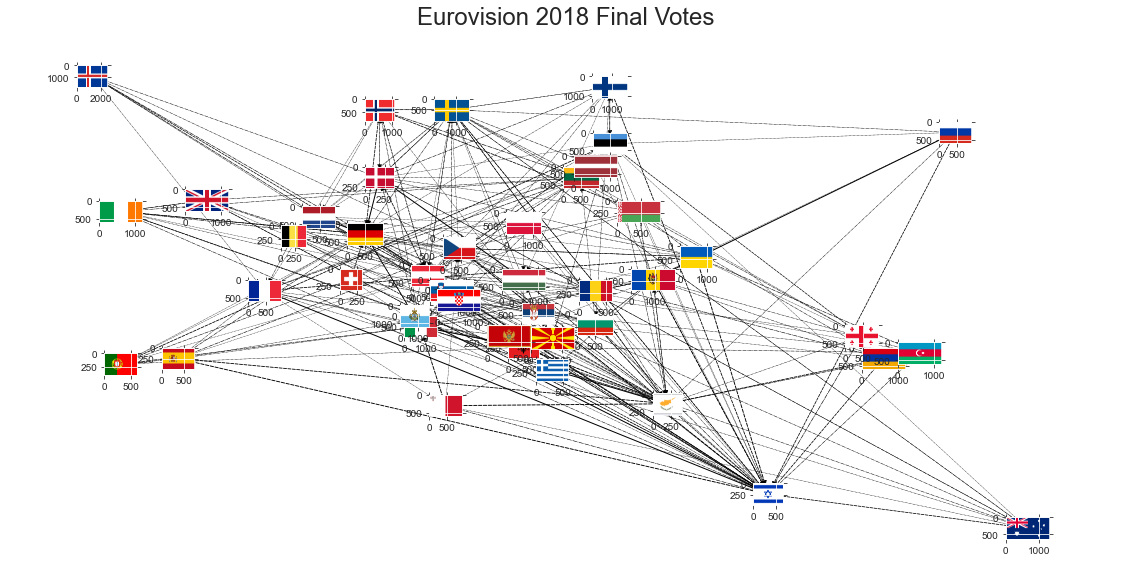

In [54]:
ax=plt.gca()
fig=plt.gcf()
plt.axis('off')
plt.title('Eurovision 2018 Final Votes',fontsize = 24)

trans = ax.transData.transform
trans2 = fig.transFigure.inverted().transform

tick_params = {'top':'off', 'bottom':'off', 'left':'off', 'right':'off',
              'labelleft':'off', 'labelbottom':'off'} #flag grid params

styles = ['dotted','dashdot','dashed','solid'] # line styles

pos = pos_geo

# draw edges
for e in G.edges(data=True):
    width = e[2]['points']/24 #normalize by max points
    style=styles[int(width*3)]
    if width>0.3: #filter small votes
        nx.draw_networkx_edges(G,pos,edgelist=[e],width=width, style=style )
        # in networkx versions >2.1 arrowheads can be adjusted

#draw nodes
for node in G.nodes():
    imsize = max((0.3*G.in_degree(node,weight='points')
                  /max(dict(G.in_degree(weight='points')).values()))**2,0.03)
    imsize = 0.03
    # size is proportional to the votes
    flag = mpl.image.imread(flags[node])

    (x,y) = pos[node]
    xx,yy = trans((x,y)) # figure coordinates
    # tu vi tri cua node qua truc toa do bien doi thanh vi tri tren figure
    xa,ya = trans2((xx,yy)) # axes coordinates

    country = plt.axes([xa-imsize/2.0,ya-imsize/2.0, imsize, imsize ])
    # ve ra
    country.imshow(flag)
    country.set_aspect('equal')
    country.tick_params(**tick_params)

fig.savefig('images/test_map.png')


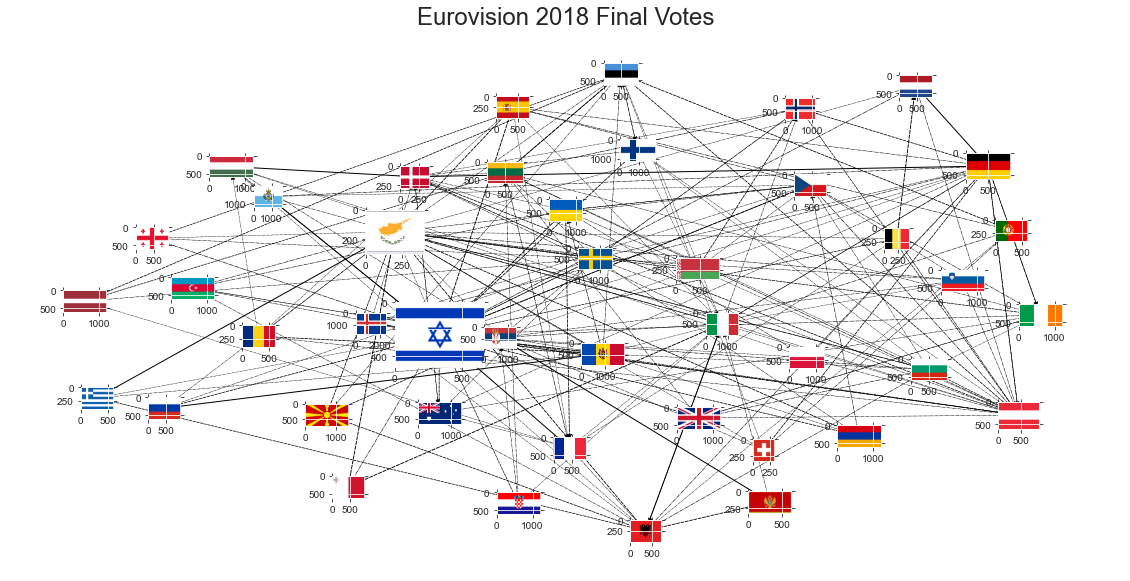

In [59]:
ax=plt.gca()
fig=plt.gcf()
plt.axis('off')
plt.title('Eurovision 2018 Final Votes',fontsize = 24)

pos = nx.layout.fruchterman_reingold_layout(G,k=1,weight = 'points',iterations=1000,scale = 2)

trans = ax.transData.transform
trans2 = fig.transFigure.inverted().transform


tick_params = {'top':'off', 'bottom':'off', 'left':'off', 'right':'off',
              'labelleft':'off', 'labelbottom':'off'} #flag grid params
styles = ['dotted','dashdot','dashed','solid'] # line styles



# draw edges
for e in G.edges(data=True):
    width = e[2]['points']/24 #normalize by max points
    style=styles[int(width*3)]
    if width>0.4: #filter small votes
        nx.draw_networkx_edges(G,pos,edgelist=[e],width=width,
                               style=style )
        # in networkx versions >2.1 arrowheads can be adjusted

#draw nodes
for node in G.nodes():
    imsize = max((0.3*G.in_degree(node,weight='points')/max(dict(G.in_degree(weight='points')).values()))**2,0.03)
    # size is proportional to the votes
    flag = mpl.image.imread(flags[node])

    (x,y) = pos[node]
    xx,yy = trans((x,y)) # figure coordinates
    xa,ya = trans2((xx,yy)) # axes coordinates

    country = plt.axes([xa-imsize/2.0,ya-imsize/2.0, imsize, imsize ], label='test')
    # them 1 truc vao hinh hien tai va bien no thanh truc hien tai.
    country.imshow(flag)
    # chen anh vao node
    country.set_aspect('equal')
    # ti le cua node. equal, auto, 0.7
    country.tick_params(**tick_params)

fig.savefig('images/test_spring.png')

In [56]:
print(pos)

{'Albania': array([-1.27090501,  1.40629825]), 'Israel': array([-2.76125406e-04, -2.00000000e+00]), 'Cyprus': array([-0.10373881,  1.01747427]), 'Austria': array([-0.23762209, -0.3620353 ]), 'Germany': array([-1.28580818,  0.06774704]), 'Italy': array([0.19841407, 1.08148091]), 'Czech Republic': array([-0.09181153, -0.78971262]), 'Sweden': array([ 0.69175304, -1.33203226]), 'Estonia': array([-1.40949395, -1.33438591]), 'Denmark': array([ 0.40565693, -0.56957863]), 'Moldova': array([ 0.23579353, -1.1704477 ]), 'Lithuania': array([-1.69321304, -0.92470231]), 'France': array([-0.81493542, -1.39167895]), 'Bulgaria': array([-0.69358711, -0.63912221]), 'Norway': array([ 0.79177518, -0.04013692]), 'Ireland': array([-1.85740282,  0.94269008]), 'Ukraine': array([ 1.40250334, -1.54421454]), 'Netherlands': array([-0.41004268,  0.08952321]), 'Serbia': array([1.71349085, 0.40434652]), 'Australia': array([0.3579734 , 0.51712152]), 'Hungary': array([0.6445344 , 0.97425034]), 'Slovenia': array([1.7946